## Dataset from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
path_data = '../misc_datasets/planets.csv'
df_planets = pd.read_csv(path_data)
# df_planets

In [5]:
path_dict = '../misc_datasets/planets_data_dict.csv'
df_planets_data_dict = pd.read_csv(path_dict)
# df_planets_data_dict

In [6]:
planet_data_dict = dict()
data_list = df_planets_data_dict['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu']

for i in range(2, len(data_list)):
    data_list[i] = data_list[i].replace("# COLUMN ", "").split(":")
    planet_data_dict[data_list[i][0]] = data_list[i][1].strip()

In [8]:
df_planets_clean = df_planets.rename(columns = planet_data_dict).drop("rowid", 1)

In [63]:
# We should remove null values for range of masses for the second analysis of Earth similarity. 
# We should NOT remove null values for range of masses for the first analysis of planet visualization. 

## First Analysis: Planet Visualization Based on Host Star Distance and Relative Radius

In [18]:
df_planet_radius_estimate = df_planets_clean[df_planets_clean["Planet Radius [Earth radii]"].notnull()][["Planet Radius [Earth radii]"]]
# df_planet_radius_estimate

In [19]:
df_planet_star_distance_estimate = df_planets_clean[df_planets_clean["Ratio of Distance to Stellar Radius"].notnull()][["Ratio of Distance to Stellar Radius"]]
# df_planet_star_distance_estimate

In [41]:
dataset1 = pd.concat([df_planet_radius_estimate, df_planet_star_distance_estimate], axis=1, join='inner')
dataset1['Data Point Size'] = round(1000 * (dataset1['Planet Radius [Earth radii]'] / dataset1['Planet Radius [Earth radii]'].max()), 2)
# dataset1

203.6763487604552


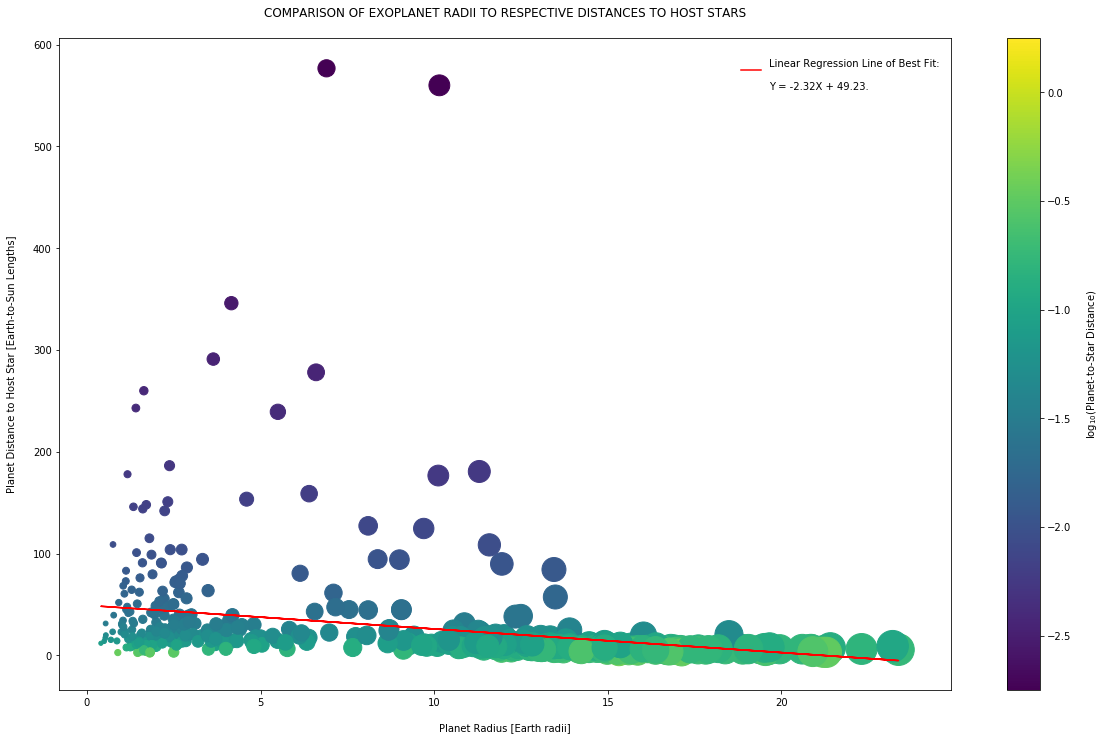

In [43]:
# Display scatter plot (X: Planet Radius, Y: Distance to Star)
X = dataset1['Planet Radius [Earth radii]']
Y = dataset1['Ratio of Distance to Stellar Radius']
Z = dataset1['Data Point Size']

plt.title('COMPARISON OF EXOPLANET RADII TO RESPECTIVE DISTANCES TO HOST STARS\n')
plt.xlabel('\nPlanet Radius [Earth radii]')
plt.ylabel('Planet Distance to Host Star [Earth-to-Sun Lengths]\n')

fitness = np.polyfit(X, Y, deg=1)
m = fitness[0]
b = fitness[1]
Y_hat = (m * X) + b
print(np.var(Y_hat))
Y_hat_label = 'Y = {}X + {}.'.format(round(m, 2), round(b, 2))
# print('\n\nRegression line of best fit is: Y =', round(m, 2), 'X +', round(b, 2), '\n\n')
plt.plot(X, Y_hat, color='red', label='\nLinear Regression Line of Best Fit: \n\n{}'.format(Y_hat_label))
plt.scatter(X, Y, s=Z, label=None, c=-np.log10(Y), cmap='viridis')
plt.colorbar(label='\nlog$_{10}$(Planet-to-Star Distance)')
plt.clim(-2.75, 0.25)
plt.legend(frameon=False, loc='upper right')

# Get figure size and set height to 12 and width to 20
fig_size = plt.rcParams['figure.figsize']
fig_size
fig_size[0] = 20    # width
fig_size[1] = 12    # height
# plt.rcParams['figure.figsize'] = fig_size

## Second Analysis: Planet Mapping Based on Similarity to Earth

In [44]:
df_planet_masses_ranged = df_planets_clean[["Planet Mass or M*sin(i) [Earth mass]", "Planet Mass or M*sin(i) Upper Unc. [Earth mass]", "Planet Mass or M*sin(i) Lower Unc. [Earth mass]"]]
# df_planet_masses_simple = df_planets_clean[["Planet Mass or M*sin(i) [Earth mass]"]]
df_planet_masses_ranged_cleaned = df_planet_masses_ranged[df_planet_masses_ranged["Planet Mass or M*sin(i) Lower Unc. [Earth mass]"].notnull()]
df_planet_masses_simple_cleaned = df_planet_masses_ranged_cleaned[["Planet Mass or M*sin(i) [Earth mass]"]]

# df_planet_masses_ranged_cleaned    # We need this to visualize planets with 
# df_planet_masses_simple_cleaned    # We need this to find planets like Earth (second analysis)

# TODO

## First Analysis:
- <del>Find and clean separate dataframes for Star Distance and Planet Radius
- <del>Align and join dataframes for Star Distance and Planet Radius
- Filter outliers using 1.5x method
- <del>Visualization via Scatterplot (As they increase in Planet Radius value, they increase in visual size)
- <del>[STRETCH] Find approximate line of regression (MatPlotLib and SciPy)

## Second Analysis:
- Create list of label vectors for Earth similarity
- Find, clean, align, and join dataframes for all planets having values for similarity vectors
- Filter outliers using 1.5x method
- Sample X amount of planets from joined data population
- Check for similarity to Earth (does the value ranges cross or fall within ranges)
- [SUPER STRETCH] Use kNN to approximate similarity between 